# Load Data and Display Samples

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random

# Check if the current working directory is the notebooks directory
if 'notebooks' in os.path.basename(os.getcwd()):
    # Change directory to the parent of notebooks
    %cd ..
    print("Changed working directory to the project root:", os.getcwd())
else:
    print("Working directory:", os.getcwd())

Working directory: c:\Users\sghys\My Drive (sghyseli@student.ubc.ca)\Machine Vision


## Load Data

The data is being stored in pickle files. They are from Python2 era and the strings are stored as bytecode. The unpickle function in the data directory addresses the proper conversion of these values over to strings. The data is in 5 batches as follows:

*data* -- a 10000x3072 numpy array of uint8s. Each row of the array stores a 32x32 colour image. The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. The image is stored in row-major order, so that the first 32 entries of the array are the red channel values of the first row of the image.

*labels* -- a list of 10000 numbers in the range 0-9. The number at index i indicates the label of the ith image in the array data.

---

The dataset contains another file, called batches.meta. It too contains a Python dictionary object. It has the following entries:

*label_names* -- a 10-element list which gives meaningful names to the numeric labels in the labels array described above. For example, label_names[0] == "airplane", label_names[1] == "automobile", etc.

In [5]:
from data.load_data import unpickle

# Parse the filepaths for the data batches
file_paths = ['data/' + file_name for file_name in os.listdir("data") if file_name.startswith("data")]

# Load each batch and store the data dictionaries in a list
dictionaries = [unpickle(file_path) for file_path in file_paths]
# Load the meta-data for the overall dataset
meta_data = unpickle("data/batches.meta")

# Report the number of images in each batch
print(f'Number of images in each batch: {[len(dictionary["data"]) for dictionary in dictionaries]}')

# Extract the label names and display
label_names = meta_data["label_names"]
print(f'Set label names: {label_names}')

['.git', '.gitignore', '.vscode', 'CUDAtestingMatmult.py', 'data', 'notebooks', 'README.md', 'view_data.ipynb']
Number of images in each batch: [10000, 10000, 10000, 10000, 10000]
Set label names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


Shape of images: (10000, 32, 32, 3)
Shape of labels: 10000


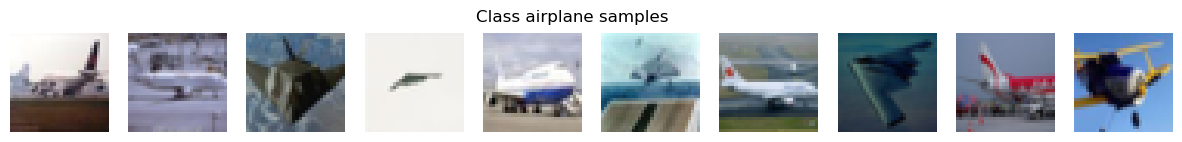

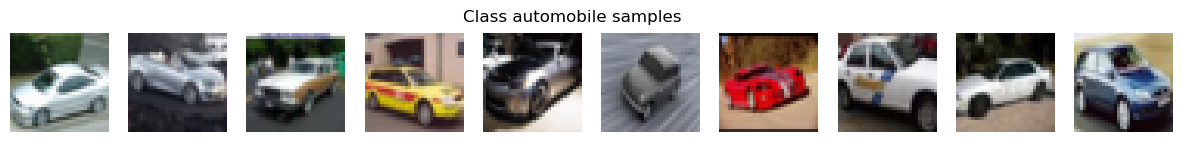

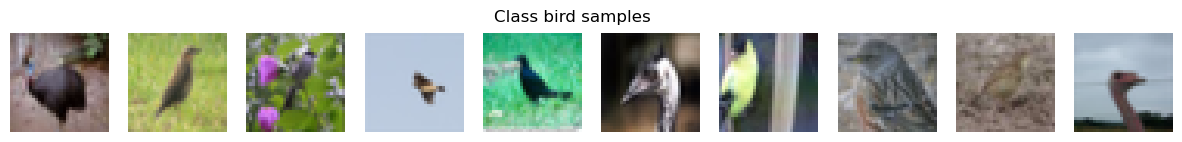

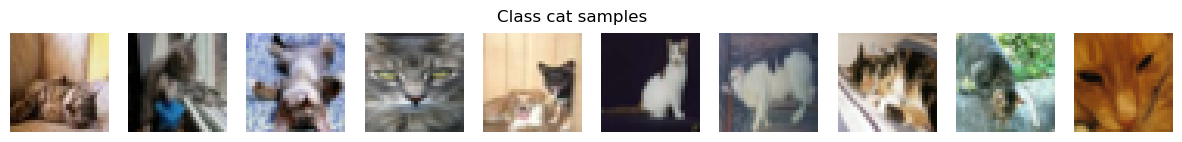

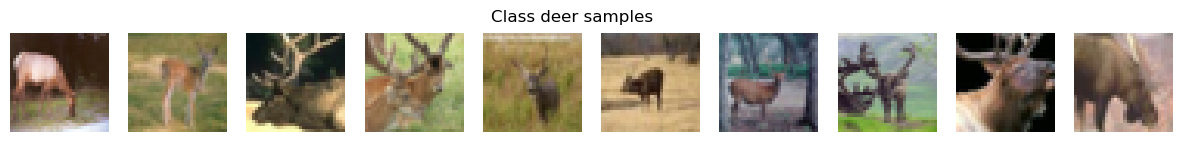

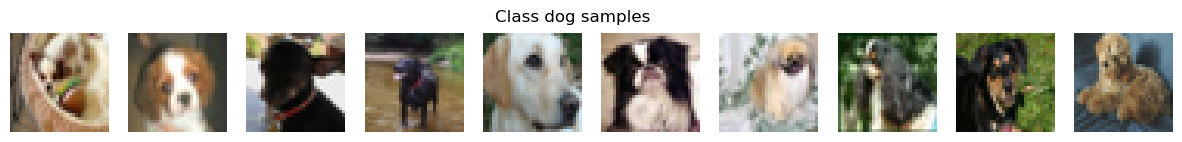

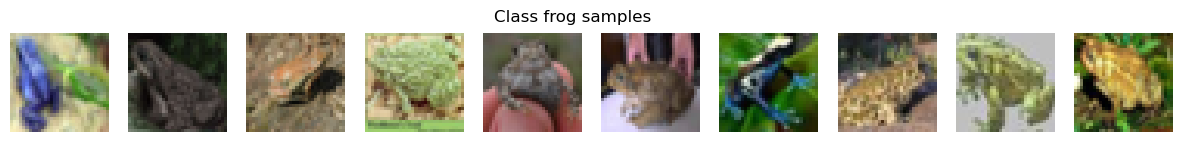

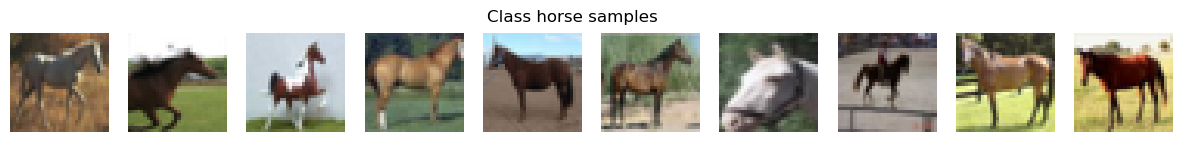

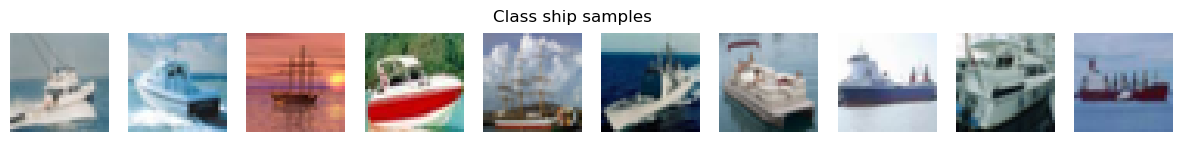

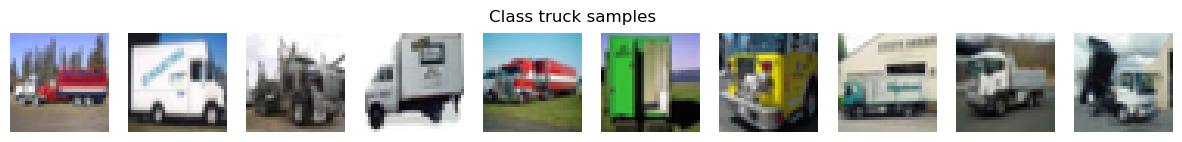

In [7]:
# Load a single dictionary
set1 = dictionaries[0]

# Extracting data and labels from set1
data = set1['data']
labels = set1['labels']

# Reshaping the data to a more manageable format (10000, 32, 32, 3)
images = data.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)

# Verifying the shape of images and labels
print(f"Shape of images: {images.shape}")
print(f"Shape of labels: {len(labels)}")

# Number of classes and number of samples per class to display
num_classes = 10
samples_per_class = 10

for cls in range(num_classes):
    # Indices for images of this class
    idxs = [i for i, lbl in enumerate(labels) if lbl == cls]
    
    # Randomly select 10 indices
    random_idxs = random.sample(idxs, samples_per_class)
    
    # Plotting
    plt.figure(figsize=(15, 1.5))
    plt.suptitle(f"Class {label_names[cls]} samples")
    for i, idx in enumerate(random_idxs):
        plt.subplot(1, samples_per_class, i + 1)
        plt.imshow(images[idx].astype('uint8'))
        plt.axis('off')
    plt.show()
